In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
!pip install nltk
import nltk
from nltk.corpus  import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Prodigy/Task-4/twitter_training.csv')

EXPLORATORY DATA ANLAYSIS

In [7]:
df.shape

(74681, 4)

In [8]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [9]:
df


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [10]:
pd.set_option('display.max_colwidth', None)

In [11]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my Mac is like 6 years behind Nvidia drivers and I have no idea how I did not notice
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is 6 years behind on Nvidia drivers and I have no idea how I didn't notice
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice
74679,9200,Nvidia,Positive,Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice


In [12]:
df['Borderlands'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [13]:
df['Positive'].value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Positive, dtype: int64

In [14]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [15]:
df.describe(include = 'all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [16]:
df.columns = [ 'EntryId', 'GameName' , 'Sentiment' , 'Text']

In [17]:
non_game_names = ['Microsoft' , 'Verizon' , 'Facebook' , 'johnson & johnson' , 'Amazon' , 'Home Depot','Xbox(X series)', 'PlayStation5 (PS5)','Nvidia','Google']

df = df[~df['GameName'].isin(non_game_names)]

In [18]:
df

,EntryId,GameName,Sentiment,Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH


In [19]:
df['GameName'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
CallOfDuty                           2394
LeagueOfLegends                      2394
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
Battlefield                          2346
TomClancysGhostRecon                 2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
PlayStation5(PS5)                    2310
HomeDepot                            2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)                  2304
Hearthstone                          2298
Borderlands                          2285
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                          

In [20]:
df.shape


(60617, 4)

In [21]:
missing_values = df.isna().sum()
missing_values

EntryId        0
GameName       0
Sentiment      0
Text         531
dtype: int64

In [22]:
df=df.dropna()


In [23]:
df.isna().sum()

EntryId      0
GameName     0
Sentiment    0
Text         0
dtype: int64

In [24]:
df = df[~df['Sentiment'].isin(['Irrelevant'])]

In [25]:
df.shape

(49038, 4)

In [26]:

def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def remove_non_alphabetic(tokens):
    return [word for word in tokens if word.isalpha()]

def stem_words(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def preprocess_text(text):
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    tokens = remove_non_alphabetic(tokens)
    tokens = stem_words(tokens)
    return tokens


df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [27]:
df

,EntryId,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[in, tom, clanci, a, the, ghost, hous, recon, choke, point, ift, tt]"


In [29]:
from collections import Counter
import itertools


all_words = list(itertools.chain(*df['Processed_Text']))
word_counts = Counter(all_words)


repeating_words = {word: count for word, count in word_counts.items() if count > 1}

In [30]:
sentiment_counts = df['Sentiment'].value_counts()

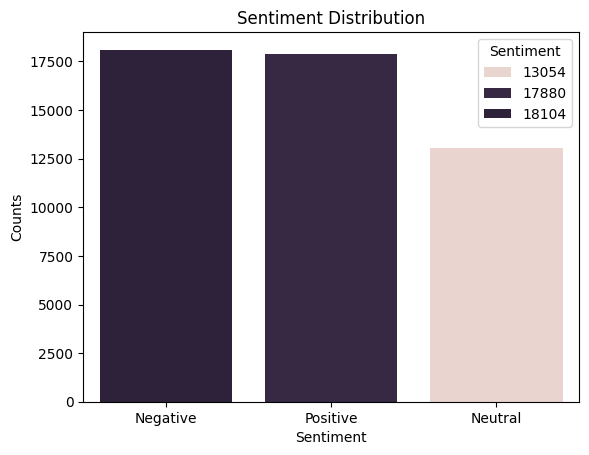

In [34]:
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts)
plt.title('Sentiment Distribution')
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()

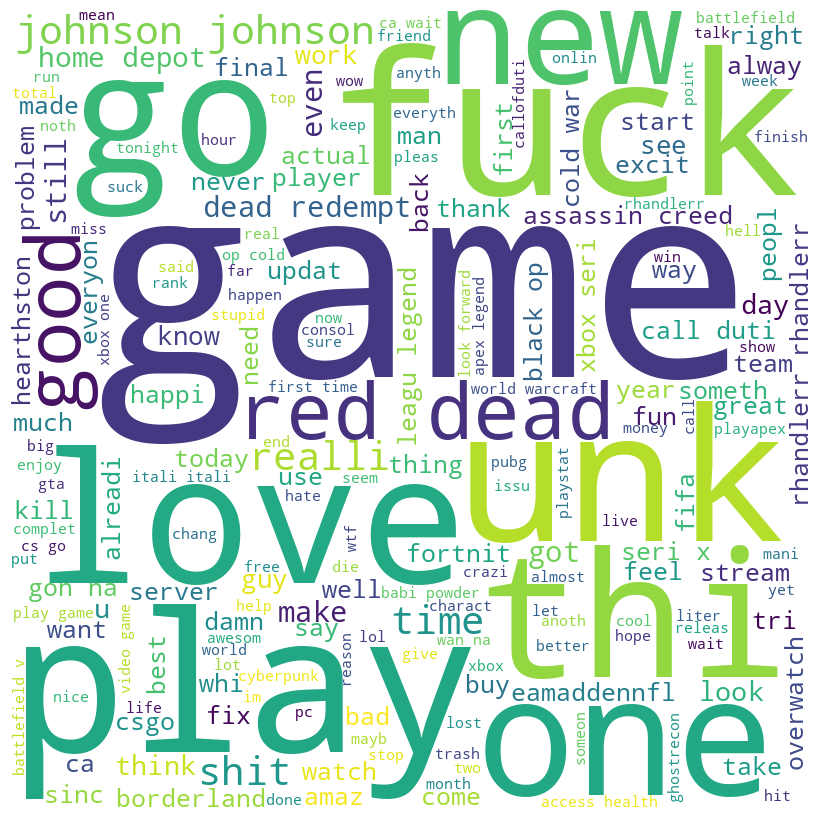

In [35]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(' '.join(all_words))


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [36]:
df

,EntryId,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[in, tom, clanci, a, the, ghost, hous, recon, choke, point, ift, tt]"


In [37]:
from collections import defaultdict, Counter


positive_words = defaultdict(int)
negative_words = defaultdict(int)
neutral_words = defaultdict(int)


for _, row in df.iterrows():
    sentiment = row['Sentiment']
    for word in row['Processed_Text']:
        if sentiment == 'Positive':
            positive_words[word] += 1
        elif sentiment == 'Negative':
            negative_words[word] += 1
        elif sentiment == 'Neutral':
            neutral_words[word] += 1



most_common_positive = Counter(positive_words).most_common(30)
most_common_negative = Counter(negative_words).most_common(30)
most_common_neutral = Counter(neutral_words).most_common(30)

<Figure size 1000x500 with 0 Axes>

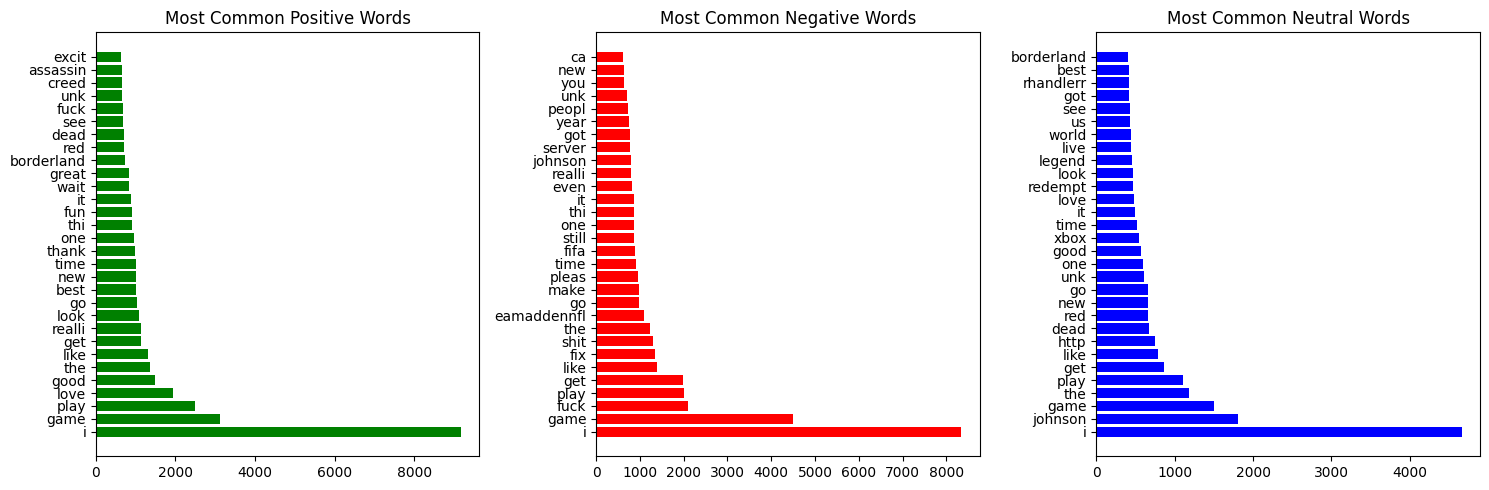

In [39]:
plt.figure(figsize=(10,5))
def plot_most_common_words(most_common, title, ax, color):
    words, counts = zip(*most_common)
    ax.barh(words, counts, color=color)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


plot_most_common_words(most_common_positive, 'Most Common Positive Words', axes[0], 'green')
plot_most_common_words(most_common_negative, 'Most Common Negative Words', axes[1], 'red')
plot_most_common_words(most_common_neutral, 'Most Common Neutral Words', axes[2], 'blue')

plt.tight_layout()
plt.show()

In [40]:

print("Two Most Common Positive Words:", most_common_positive[:2])
print("Two Most Common Negative Words:", most_common_negative[:2])
print("Two Most Common Neutral Words:", most_common_neutral[:2])

Two Most Common Positive Words: [('i', 9183), ('game', 3113)]
Two Most Common Negative Words: [('i', 8347), ('game', 4492)]
Two Most Common Neutral Words: [('i', 4664), ('johnson', 1807)]


In [41]:

game_name_encoder = LabelEncoder()


df['GameName_Encoded'] = game_name_encoder.fit_transform(df['GameName'])


game_name_mapping = dict(zip(game_name_encoder.classes_, game_name_encoder.transform(game_name_encoder.classes_)))

print("Game Name to Number Mapping:")
print(game_name_mapping)

Game Name to Number Mapping:
{'ApexLegends': 0, 'AssassinsCreed': 1, 'Battlefield': 2, 'Borderlands': 3, 'CS-GO': 4, 'CallOfDuty': 5, 'CallOfDutyBlackopsColdWar': 6, 'Cyberpunk2077': 7, 'Dota2': 8, 'FIFA': 9, 'Fortnite': 10, 'GrandTheftAuto(GTA)': 11, 'Hearthstone': 12, 'HomeDepot': 13, 'LeagueOfLegends': 14, 'MaddenNFL': 15, 'NBA2K': 16, 'Overwatch': 17, 'PlayStation5(PS5)': 18, 'PlayerUnknownsBattlegrounds(PUBG)': 19, 'RedDeadRedemption(RDR)': 20, 'TomClancysGhostRecon': 21, 'TomClancysRainbowSix': 22, 'WorldOfCraft': 23, 'Xbox(Xseries)': 24, 'johnson&johnson': 25}


In [43]:

sentiment_encoder = LabelEncoder()


df['Sentiment_Encoded'] = sentiment_encoder.fit_transform(df['Sentiment'])



label_mapping = dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_)))

print("Sentiment to Number Mapping:")
print(label_mapping)

Sentiment to Number Mapping:
{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['Processed_Text_Joined'] = df['Processed_Text'].apply(lambda x: ' '.join(x))


tfidf_vectorizer = TfidfVectorizer()


tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Text_Joined'])

In [45]:
df

,EntryId,GameName,Sentiment,Text,Processed_Text,GameName_Encoded,Sentiment_Encoded,Processed_Text_Joined
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]",3,2,i come border i kill
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]",3,2,im get borderland kill
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]",3,2,im come borderland murder
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]",3,2,im get borderland murder
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]",3,2,im get borderland murder
...,...,...,...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]",21,1,tom clanci ghost recon choke point
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]",21,1,tom clanci ghost recon choke point
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]",21,1,tom lin ghost recon choke point
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[in, tom, clanci, a, the, ghost, hous, recon, choke, point, ift, tt]",21,1,in tom clanci a the ghost hous recon choke point ift tt


In [47]:
df = df.drop(columns=['EntryId', 'GameName', 'Sentiment', 'Text', 'Processed_Text', 'Processed_Text_Joined'])


In [49]:
df.head()

,GameName_Encoded,Sentiment_Encoded
0,3,2
1,3,2
2,3,2
3,3,2
4,3,2


In [51]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


In [52]:
X = hstack((tfidf_matrix, df[['GameName_Encoded', 'Sentiment_Encoded']].values))
y = df['Sentiment_Encoded']

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:

nb_classifier = MultinomialNB()

In [55]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [56]:
predictions = nb_classifier.predict(X_test)

In [57]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))


Model accuracy score: 0.8990


In [58]:

print('Test-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, predictions)))


y_pred_train = nb_classifier.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Test-set accuracy score: 0.8990
Training-set accuracy score: 0.9214


In [60]:

cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)


print('\nMetrics for Class 0 (Neutral):')
print('True Positives:', cm[0, 0])
print('True Negatives:', cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2])
print('False Positives:', cm[0, 1] + cm[0, 2])
print('False Negatives:', cm[1, 0] + cm[2, 0])

print('\nMetrics for Class 1 (Negative):')
print('True Positives:', cm[1, 1])
print('True Negatives:', cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2])
print('False Positives:', cm[1, 0] + cm[1, 2])
print('False Negatives:', cm[0, 1] + cm[2, 1])


print('\nMetrics for Class 2 (Positive):')
print('True Positives:', cm[2, 2])
print('True Negatives:', cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print('False Positives:', cm[2, 0] + cm[2, 1])
print('False Negatives:', cm[0, 2] + cm[1, 2])

Confusion matrix

 [[5360   24   66]
 [   0 2745 1224]
 [   0  172 5121]]

Metrics for Class 0 (Neutral):
True Positives: 5360
True Negatives: 9262
False Positives: 90
False Negatives: 0

Metrics for Class 1 (Negative):
True Positives: 2745
True Negatives: 10547
False Positives: 1224
False Negatives: 196

Metrics for Class 2 (Positive):
True Positives: 5121
True Negatives: 8129
False Positives: 172
False Negatives: 1290


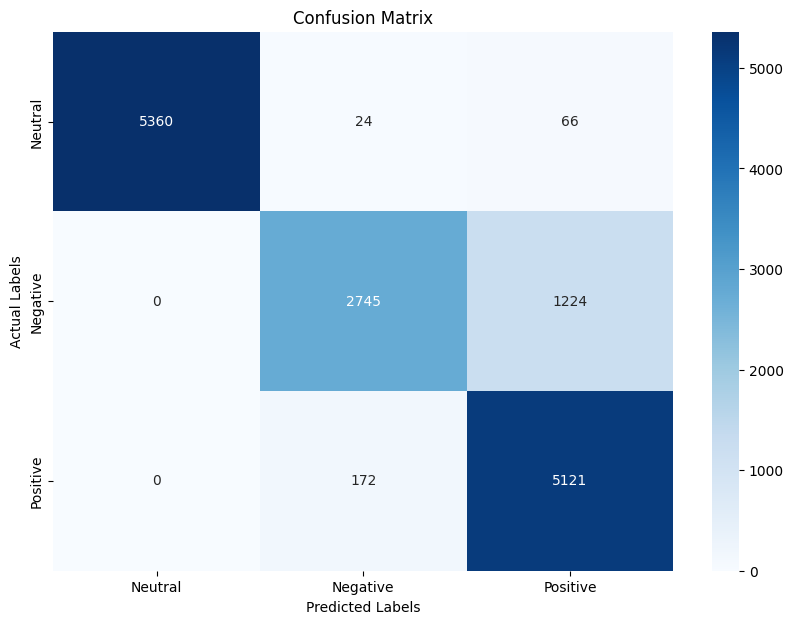

In [61]:

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral', 'Negative', 'Positive'], yticklabels=['Neutral', 'Negative', 'Positive'])
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()